In [1]:
import cv2
#cv2 is a module in Python that allows you to work with images and videos.
import numpy as np
#NumPy (Numerical Python) is a powerful library in Python for numerical computing. It provides support for arrays, 
#matrices, and many mathematical
#functions to operate on these data structures efficiently.
import os
#os is a module in Python that provides a way to interact with the operating system. It allows you to perform various 
#operating system-related tasks, 
#such as accessing the file system, manipulating paths, and executing system commands.
path = '/IncreasedImages/'
dataset_path = os.listdir('/IncreasedImages')

im_size = 224

images = []
labels = []

for i in dataset_path:
    data_path = path + str(i)  
    filenames = [i for i in os.listdir(data_path) ]
   
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

In [2]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
#It provides simple and efficient tools for data mining and data analysis, built on top of other scientific computing
#libraries like NumPy, SciPy, and 
#matplotlib.scikit-learn offers a wide range of machine learning algorithms for classification, regression, clustering,
#dimensionality reduction, and more.

y=labels
print(y)

y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)

['benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign', 'benign',

In [3]:
y=y.reshape(-1,1)

from sklearn.compose import ColumnTransformer
#ColumnTransformer is a class in the scikit-learn library for applying different transformations to different columns 
#of a dataset.
#It is particularly useful when you have a dataset with multiple columns, and you want to apply different preprocessing
#steps to different columns.

ct = ColumnTransformer([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')

#OneHotEncoder: This is a class from the sklearn.preprocessing module. The OneHotEncoder is used to encode categorical 
#variables into a binary matrix. 
#It's often used to convert categorical variables into a format that can be used by machine learning algorithms
Y = ct.fit_transform(y) #.toarray()
print(Y[:5])
print(Y[35:])

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [4]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, Y = shuffle(images, Y, random_state=1)


train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.2, random_state=415)
train_x, test_x, train_y, test_y =np.array(train_x), np.array(test_x), np.array(train_y), np.array(test_y)
#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(1596, 224, 224, 3)
(1596, 3)
(399, 224, 224, 3)
(399, 3)


In [5]:
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0
import tensorflow as tf1
import numpy as np 
import matplotlib.pyplot as plt
import os
#TensorFlow.keras is a high-level neural networks API that is built on top of TensorFlow. It provides an easy-to-use 
#interface for building and training
#neural networks.TensorFlow.keras provides a range of pre-built layers that can be used to build neural networks, 
#including convolutional layers, recurrent
#layers, and more.

#EfficientNetB0 is a pre-trained CNN model that is designed to be efficient in terms of computational resources and 
#memory usage while still achieving 
#state-of-the-art performance on various image classification and object detection tasks.



NUM_CLASSES = 3
IMG_SIZE = 224

2024-06-10 08:26:33.082122: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-10 08:26:33.082221: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-10 08:26:33.196794: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [6]:
# Input Layer: The input layer takes in an image with a size of 224x224x3 (height, width, channels).
# MBConv Block 1: The first block is a Mobile Inverted Bottleneck (MBConv) block, which consists of:
#                 A depthwise convolutional layer with 3x3 filters and a stride of 2.
                            # it applies a filter to each spatial location of the input data, rather than applying a 
                            #filter to each channel of the input 
                            #data.
#                 A pointwise convolutional layer with 1x1 filters.
                            #it applies a different filter to each channel of the input data, rather than applying the 
                            #same filter to all channels.
                            #This type of layer is often used in neural networks to reduce the number of parameters and
                            #computations required, while 
                            #still maintaining the ability to capture complex patterns in the data.
                            #single feature map or a single output of the convolutional layer is called channel.
#                 A ReLU activation function.
                            #The ReLU activation function is often used in neural networks to introduce non-linearity 
                            #into the model, while also reducing 
                            #the risk of vanishing gradients during backpropagation.
                            #is a type of activation function that maps any real-valued number to its maximum
# MBConv Block 2: The second block is another MBConv block, which consists of:
#                 A depthwise convolutional layer with 3x3 filters and a stride of 2.
#                 A pointwise convolutional layer with 1x1 filters.
#                 A ReLU activation function.
# MBConv Block 3: The third block is another MBConv block, which consists of:
#                 A depthwise convolutional layer with 3x3 filters and a stride of 2.
#                 A pointwise convolutional layer with 1x1 filters.
#                 A ReLU activation function.
# SE Block: The SE (Squeeze and Excitation) block is a type of neural network block that uses a squeeze-and-excitation
            #mechanism to adaptively recalibrate 
            #the channel-wise feature responses.
                            #Squeeze: The squeeze component is a convolutional layer that is used to reduce the spatial
                                        #dimensions of the feature maps, 
                                        #while also reducing the number of channels in the feature maps.
                            #Excitation: The excitation component is a convolutional layer that is used to recalibrate
                                        #the channel-wise 
                                        #feature responses. It is designed to selectively focus on the most important 
                                        #channels in the feature maps.
# MBConv Block 4: The fourth block is another MBConv block, which consists of:
#                 A depthwise convolutional layer with 3x3 filters and a stride of 2.
#                 A pointwise convolutional layer with 1x1 filters.
#                 A ReLU activation function.

In [7]:
def build_model(num_classes):
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    
    x = inputs
    model = EfficientNetB0(include_top=False, input_tensor=x, weights="imagenet")
    #include_top=False: This means that the model will not include the top layer (i.e., the classification head) in the
    #output.
    #input_tensor=x: This sets the input tensor to the x variable.
    #weights="imagenet": This loads the pre-trained weights from the ImageNet dataset.

    model.trainable = False
    #This line sets the trainable attribute of the model to False, which means that the pre-trained weights will not be 
    #updated during training. 
    #This is a common practice when using pre-trained models as a feature extractor, as it helps to prevent the model 
    #from overfitting to the new task.

    # Rebuild top
    x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
    #x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output):
    #This line applies a global average pooling layer to the output of the EfficientNetB0 model. This layer reduces 
    #the spatial dimensions of the output,
    #effectively flattening the output into a 1D array.
    x = layers.BatchNormalization()(x)
    #This line applies a batch normalization layer to the output of the global average pooling layer. Batch 
    #normalization helps to stabilize the 
    #training process by normalizing the input to each layer.

    top_dropout_rate = 0.2
    x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
    #This line applies a dropout layer to the output of the batch normalization layer. Dropout randomly sets 
    #a fraction of the output neurons to zero 
    #during training, which helps to prevent overfitting.top_dropout_rate is a variable that represents the 
    #dropout rate for the top layer of the model. 
    #In this case, it's set to 0.2, which means that 20% of the output neurons will be randomly dropped during training.
    outputs = layers.Dense(NUM_CLASSES, activation="softmax", name="pred")(x)
    #This line creates a dense (fully connected) layer with NUM_CLASSES output neurons. The activation="softmax"
    #argument specifies that the output
    #should be a probability distribution over the classes, where each element represents the probability of the 
    #input belonging to that class. The
    #name="pred" argument specifies the name of the output layer.

    # Compile
    model = tf1.keras.Model(inputs, outputs, name="EfficientNet")
    #This line creates a new Keras model instance that takes the input layer inputs and the output layer outputs as 
    #inputs, and assigns it the name 
    #"EfficientNet".
    optimizer = tf1.keras.optimizers.Adam(learning_rate=1e-2)
    #This line creates an instance of the Adam optimizer with a learning rate of 1e-2
    #The Adam optimizer is a stochastic gradient descent (SGD) algorithm that adapts the learning rate for each
    #parameter individually. 
    #It's a popular choice for deep learning models because it's effective, efficient, and easy to implement.
    #SGD is an optimization algorithm used to minimize the loss function of a model. It's a variant of the gradient 
    #descent algorithm, 
    #which is used to find the optimal parameters of a model by iteratively updating the parameters based on the 
    #gradient of the loss function.

    model.compile(
        optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
    )
    #This line compiles the model with the Adam optimizer, categorical cross-entropy loss function, and accuracy metric.
    #The categorical cross-entropy loss function is a common loss function used in classification problems, particularly
    #in deep learning. 
    #It's a measure of the difference between the predicted probabilities and the true labels.
    #The accuracy metric is a common evaluation metric used to measure the performance of a classification model. 
    #It's defined as the proportion
    #of correctly classified instances out of the total number of instances.

    return model

In [8]:
model = build_model(num_classes=NUM_CLASSES)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [9]:
model.summary()

Model: "EfficientNet"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 4,058,534 (15.48 MB)

 Trainable params: 6,403 (25.01 KB)

 Non-trainable params: 4,052,131 (15.46 MB)

In [10]:
import matplotlib.pyplot as plt


def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    #plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()



Epoch 1/100


I0000 00:00:1718008040.469891      66 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


50/50 - 57s - 1s/step - accuracy: 0.6999 - loss: 1.0854
Epoch 2/100
50/50 - 1s - 25ms/step - accuracy: 0.8214 - loss: 0.6050
Epoch 3/100
50/50 - 1s - 25ms/step - accuracy: 0.8415 - loss: 0.5510
Epoch 4/100
50/50 - 1s - 26ms/step - accuracy: 0.8571 - loss: 0.4820
Epoch 5/100
50/50 - 1s - 25ms/step - accuracy: 0.8521 - loss: 0.5730
Epoch 6/100
50/50 - 1s - 25ms/step - accuracy: 0.8615 - loss: 0.4974
Epoch 7/100
50/50 - 1s - 25ms/step - accuracy: 0.8697 - loss: 0.4883
Epoch 8/100
50/50 - 1s - 25ms/step - accuracy: 0.8741 - loss: 0.5013
Epoch 9/100
50/50 - 1s - 25ms/step - accuracy: 0.8653 - loss: 0.5056
Epoch 10/100
50/50 - 1s - 25ms/step - accuracy: 0.8647 - loss: 0.6004
Epoch 11/100
50/50 - 1s - 25ms/step - accuracy: 0.8810 - loss: 0.5207
Epoch 12/100
50/50 - 1s - 25ms/step - accuracy: 0.8954 - loss: 0.4316
Epoch 13/100
50/50 - 1s - 25ms/step - accuracy: 0.8784 - loss: 0.4573
Epoch 14/100
50/50 - 1s - 25ms/step - accuracy: 0.8841 - loss: 0.4637
Epoch 15/100
50/50 - 1s - 25ms/step - accu

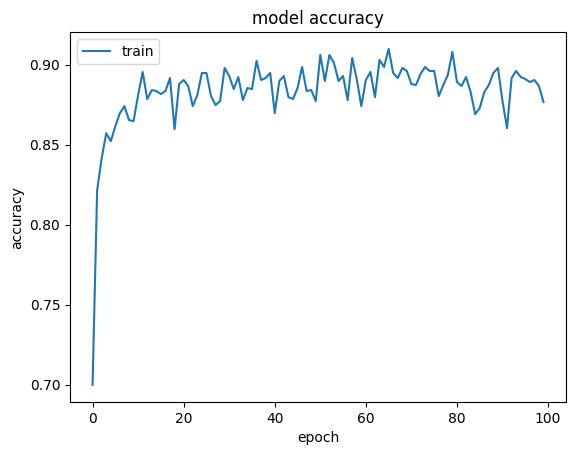

In [11]:
epochs = 100
hist = model.fit(train_x, train_y, epochs=epochs, verbose=2)
plot_hist(hist)

In [12]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 552ms/step - accuracy: 0.9390 - loss: 0.1731
Loss = 0.2289724200963974
Test Accuracy = 0.9223057627677917


In [13]:
model.save_weights("Efficient_Net_Final.weights.h5")

In [14]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

test_loss, test_accuracy = model.evaluate(test_x, test_y)
print(f"Test Accuracy: {test_accuracy}")

# Convert test_y to 1D array if it's in the format of multilabel-indicator
test_y_classes = np.argmax(test_y, axis=1)

# Predict classes for test data using model.predict
y_pred_probs = model.predict(test_x)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Generate and print classification report
print("Classification Report:")
print(classification_report(test_y_classes, y_pred_classes))

# Generate and print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(test_y_classes, y_pred_classes))
#Rows: The rows of the confusion matrix represent the actual classes.
#Columns: The columns represent the predicted classes.


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9390 - loss: 0.1731
Test Accuracy: 0.9223057627677917
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 481ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.88      0.92       131
           1       0.89      0.94      0.91       126
           2       0.92      0.95      0.93       142

    accuracy                           0.92       399
   macro avg       0.92      0.92      0.92       399
weighted avg       0.92      0.92      0.92       399

Confusion Matrix:
[[115  10   6]
 [  2 118   6]
 [  2   5 135]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


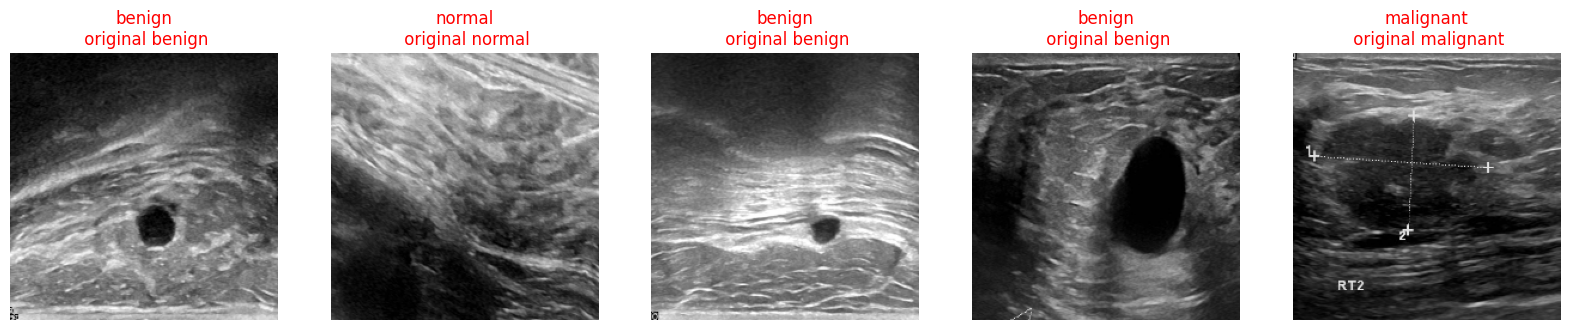

In [15]:
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import random
from keras.applications.imagenet_utils import preprocess_input

fig, axs = plt.subplots(1, 5, figsize=(20, 5))

for i, ax in enumerate(axs):
    directory = '/IncreasedImages'
    folder = random.choice([f for f in os.listdir(directory) if os.path.isdir(os.path.join(directory, f))])
    file = random.choice([f for f in os.listdir(os.path.join(directory, folder)) if os.path.isfile(os.path.join(directory, folder, f))])
    img_path = os.path.join(directory, folder, file)
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))
    x = np.expand_dims(img, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    class_labels = ['benign', 'malignant', 'normal']
    predicted_class = class_labels[np.argmax(preds[0])]
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax.axis('off')
    ax.set_title(predicted_class+"\n original "+folder, fontsize=12, color='red')

plt.show()